# napari-imagegrains Statistical analysis: grain size

This widget allows you to post-process the segmentation results in order to compute statistical information about imagegrains.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import napari
from napari_imagegrains.imgr_proc_widget import ImageGrainProcWidget
from napari_imagegrains.imgr_demodata_widget import ImageGrainDemoWidget
from napari_imagegrains.imgr_stats_widget import ImageGrainStatsWidget
from pathlib import Path
import os
import shutil

In [3]:
demodata_folder = Path.home().joinpath("imagegrains/")
if demodata_folder.exists() and demodata_folder.is_dir():
    shutil.rmtree(demodata_folder)

In [4]:
viewer = napari.Viewer()
demo_widget = ImageGrainDemoWidget(viewer=viewer)
demo_widget._on_click_download_demodata()

self = demo_widget.widget

"""
viewer = napari.Viewer()
self = ImageGrainProcWidget(viewer=viewer)
viewer.window.add_dock_widget(self);
"""

'\nviewer = napari.Viewer()\nself = ImageGrainProcWidget(viewer=viewer)\nviewer.window.add_dock_widget(self);\n'

In [5]:
exports_folder = Path.home().joinpath("imagegrains/exports/")
if not exports_folder.exists():
    os.makedirs(exports_folder, exist_ok=True)

In [6]:
self.pred_directory.set_value(exports_folder)

In [7]:
self.image_folder = Path.home().joinpath("imagegrains/demo_data/FH/train/")

In [8]:
self.viewer.layers.clear()

In [9]:
self.image_list.update_from_path(self.image_folder)
self.image_list.setCurrentRow(0)

In [10]:
self.check_save_mask.setChecked(True)
self._on_click_segment_image_folder()

In [11]:
self.viewer.close_all()

1

In [12]:
viewer = napari.Viewer()
self = ImageGrainStatsWidget(viewer=viewer)
viewer.window.add_dock_widget(self);
self.image_folder = Path.home().joinpath("imagegrains/demo_data/FH/train/")
self.image_list.update_from_path(self.image_folder)
self.mask_folder = Path.home().joinpath("imagegrains/exports")
self.mask_list.update_from_path(self.mask_folder)
self._on_run_grainsize_on_folder()
self.image_list.setCurrentRow(4)

C:\Users\micha\imagegrains\exports:  33%|██████████████▎                            | 2/6 [00:00<00:00, 15.05file/s]

1_P1060330_1_full_set_1_pred : 55  grains found
2_P1060338_0_full_set_1_pred : 31  grains found
3_P1060343_3_full_set_1_pred : 148  grains found


C:\Users\micha\imagegrains\exports: 100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 12.83file/s]

5_P1060351_2_full_set_1_pred : 100  grains found
6_P1060355_0_full_set_1_pred : 85  grains found
7_P1060359_3_full_set_1_pred : 104  grains found


C:\Users\micha\imagegrains\exports: 100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 12.91file/s]


In [13]:
self.tabs.setCurrentIndex(1)

---

## Prerequisites

Correct functionality of the `Grain size` tab requires   
1) an image from the image list in the `Properties` tab to be selected  
2) a `Run on folder` operation in the `Properties` tab performed (with the corresponding `csv files` saved in the `export folder`)

---

## Grain size statistics

In the dropdown menu, select the parameter you are interested in (e.g. `ell: b-axis (px)`) and click on `Plot for image`. You obtain a plot of the grain size distribution for the image and the parameter you selected.

In [14]:
self.combobox_props_for_size.set_value("ell: b-axis (px)")
self._on_plot_gsd_image()

C:\Users\micha\anaconda3\envs\napari-imgr4-osgeo\Lib\site-packages\imagegrains\plotting.py:512: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


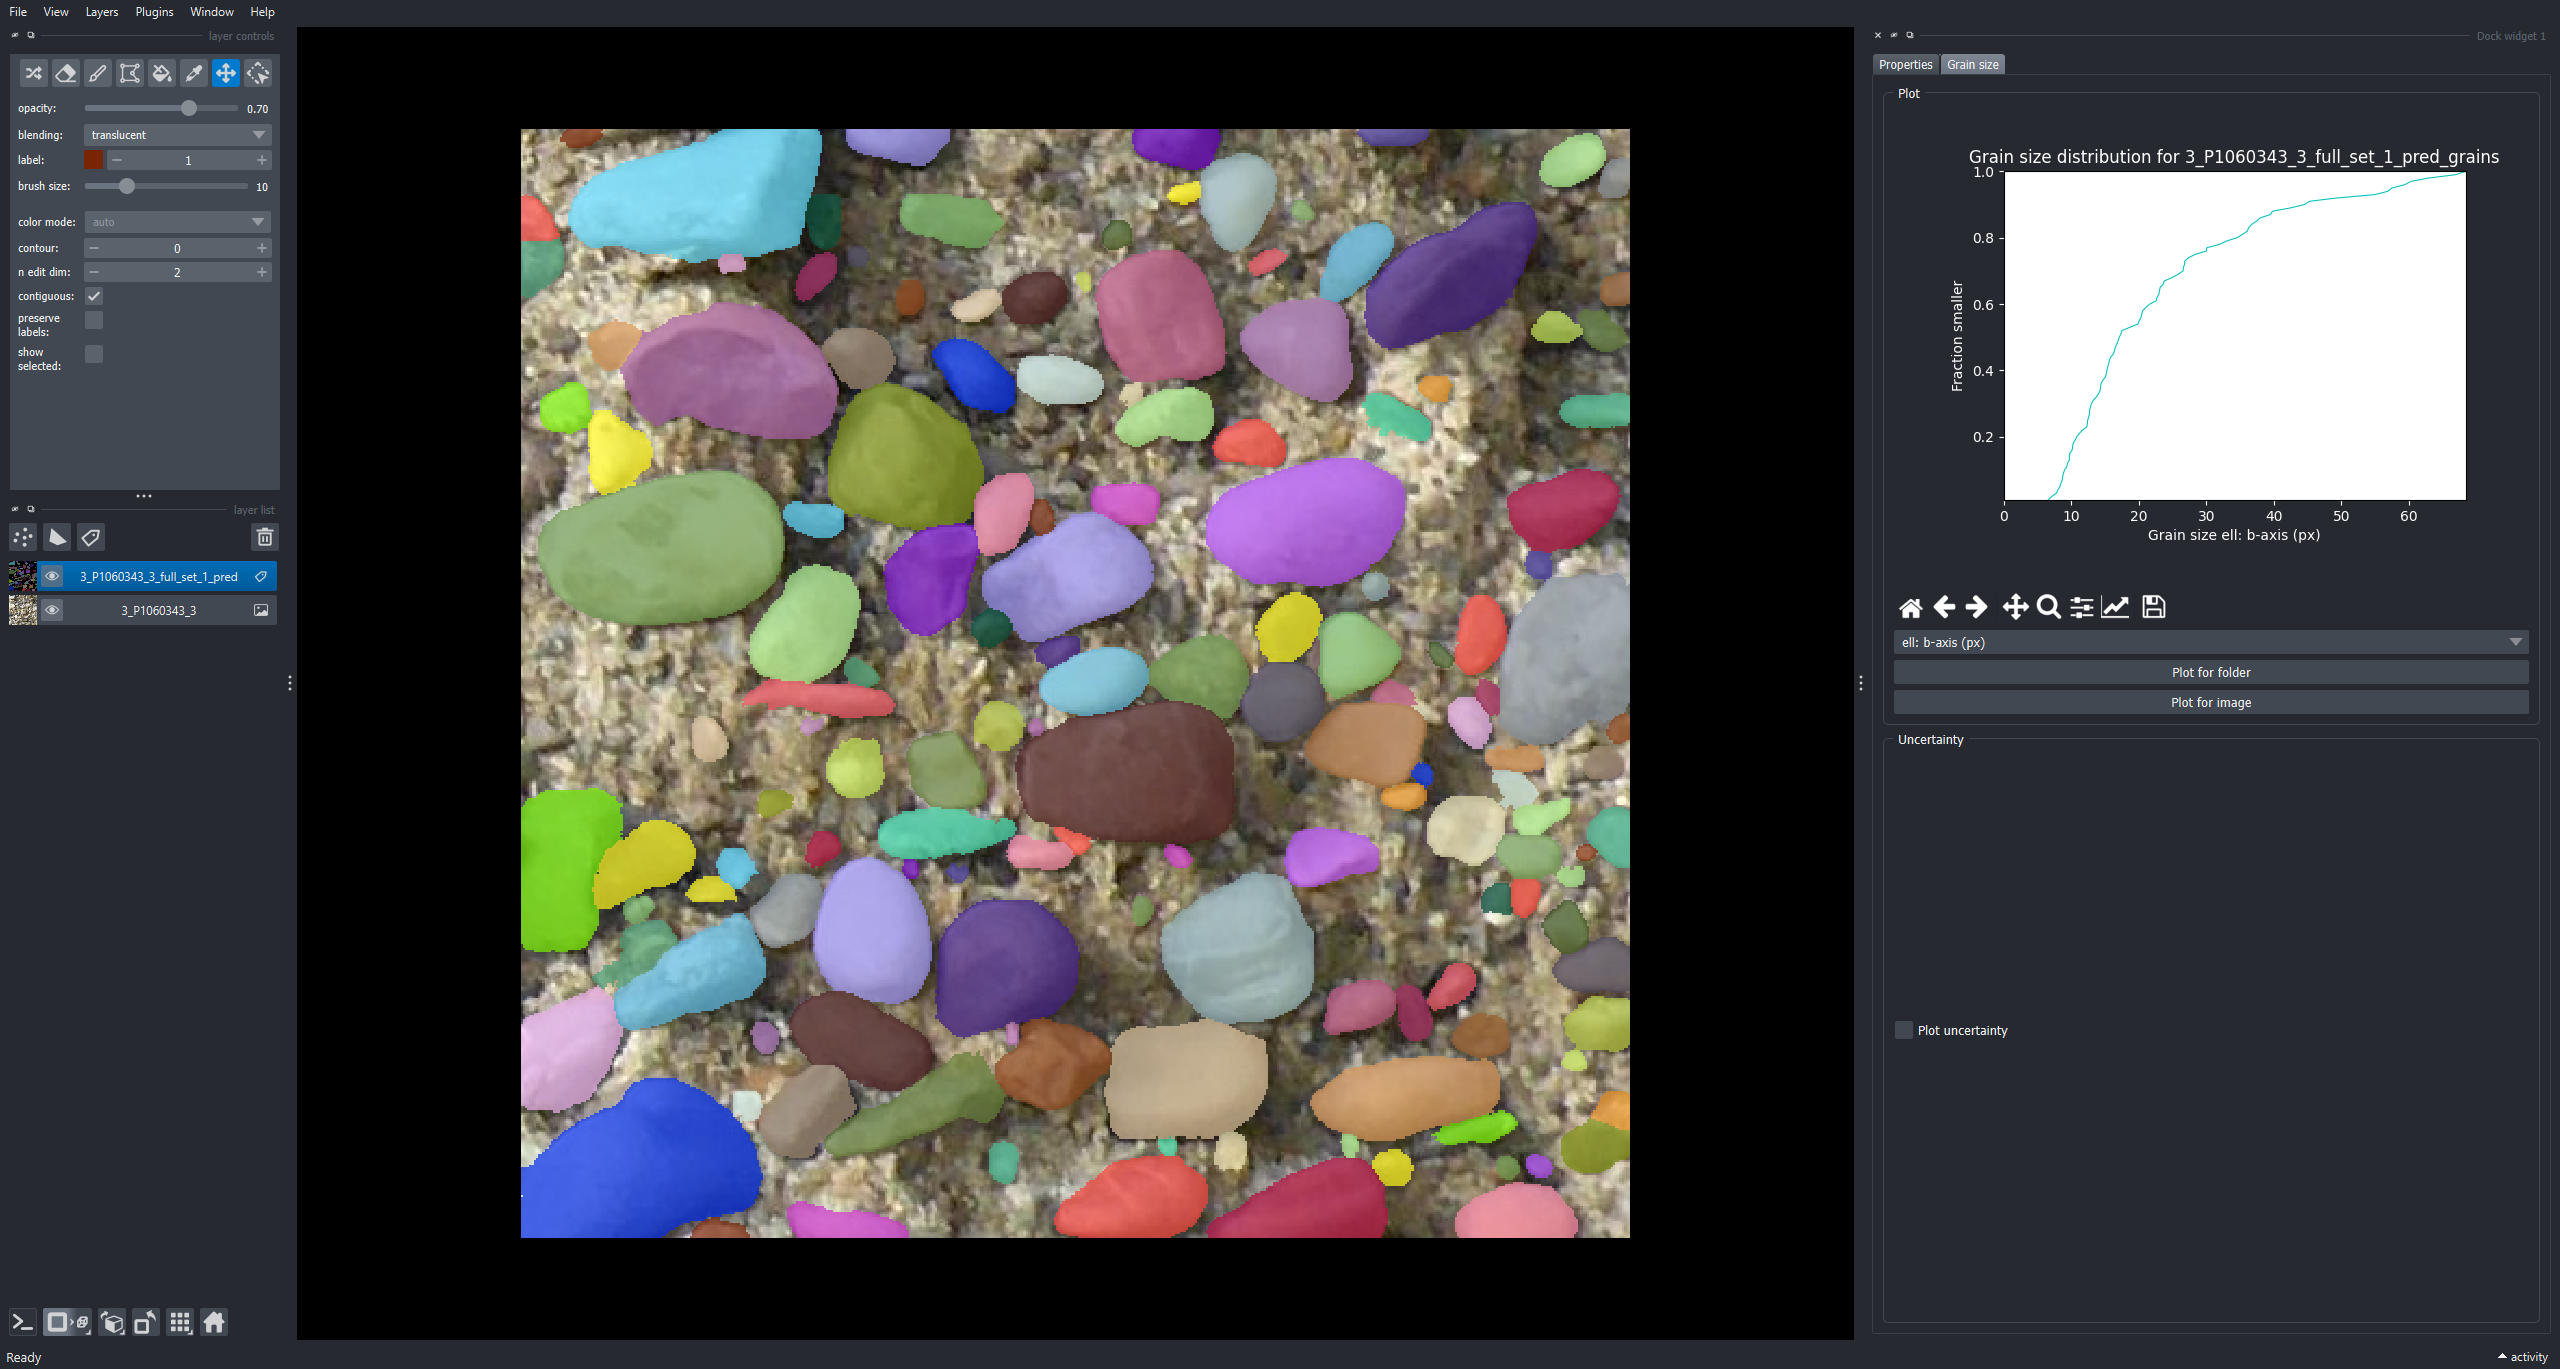

In [15]:
napari.utils.NotebookScreenshot(viewer)

In order to also visualize the uncertainty, activate the `Plot uncertainty` checkbox. A dropdown menu appears, allowing to select uncertainty type. By default, `bootstrapping` is active. Click on `Plot for image` again. Now your plot also contains the uncertainty margins displayed.

In [16]:
self.check_uncertainty.setChecked(True)
self.combobox_uncertainty.set_value("bootstrapping")

In [17]:
self._on_plot_gsd_image()

ell: b-axis (px) bootstrapping: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.30gsd/s]


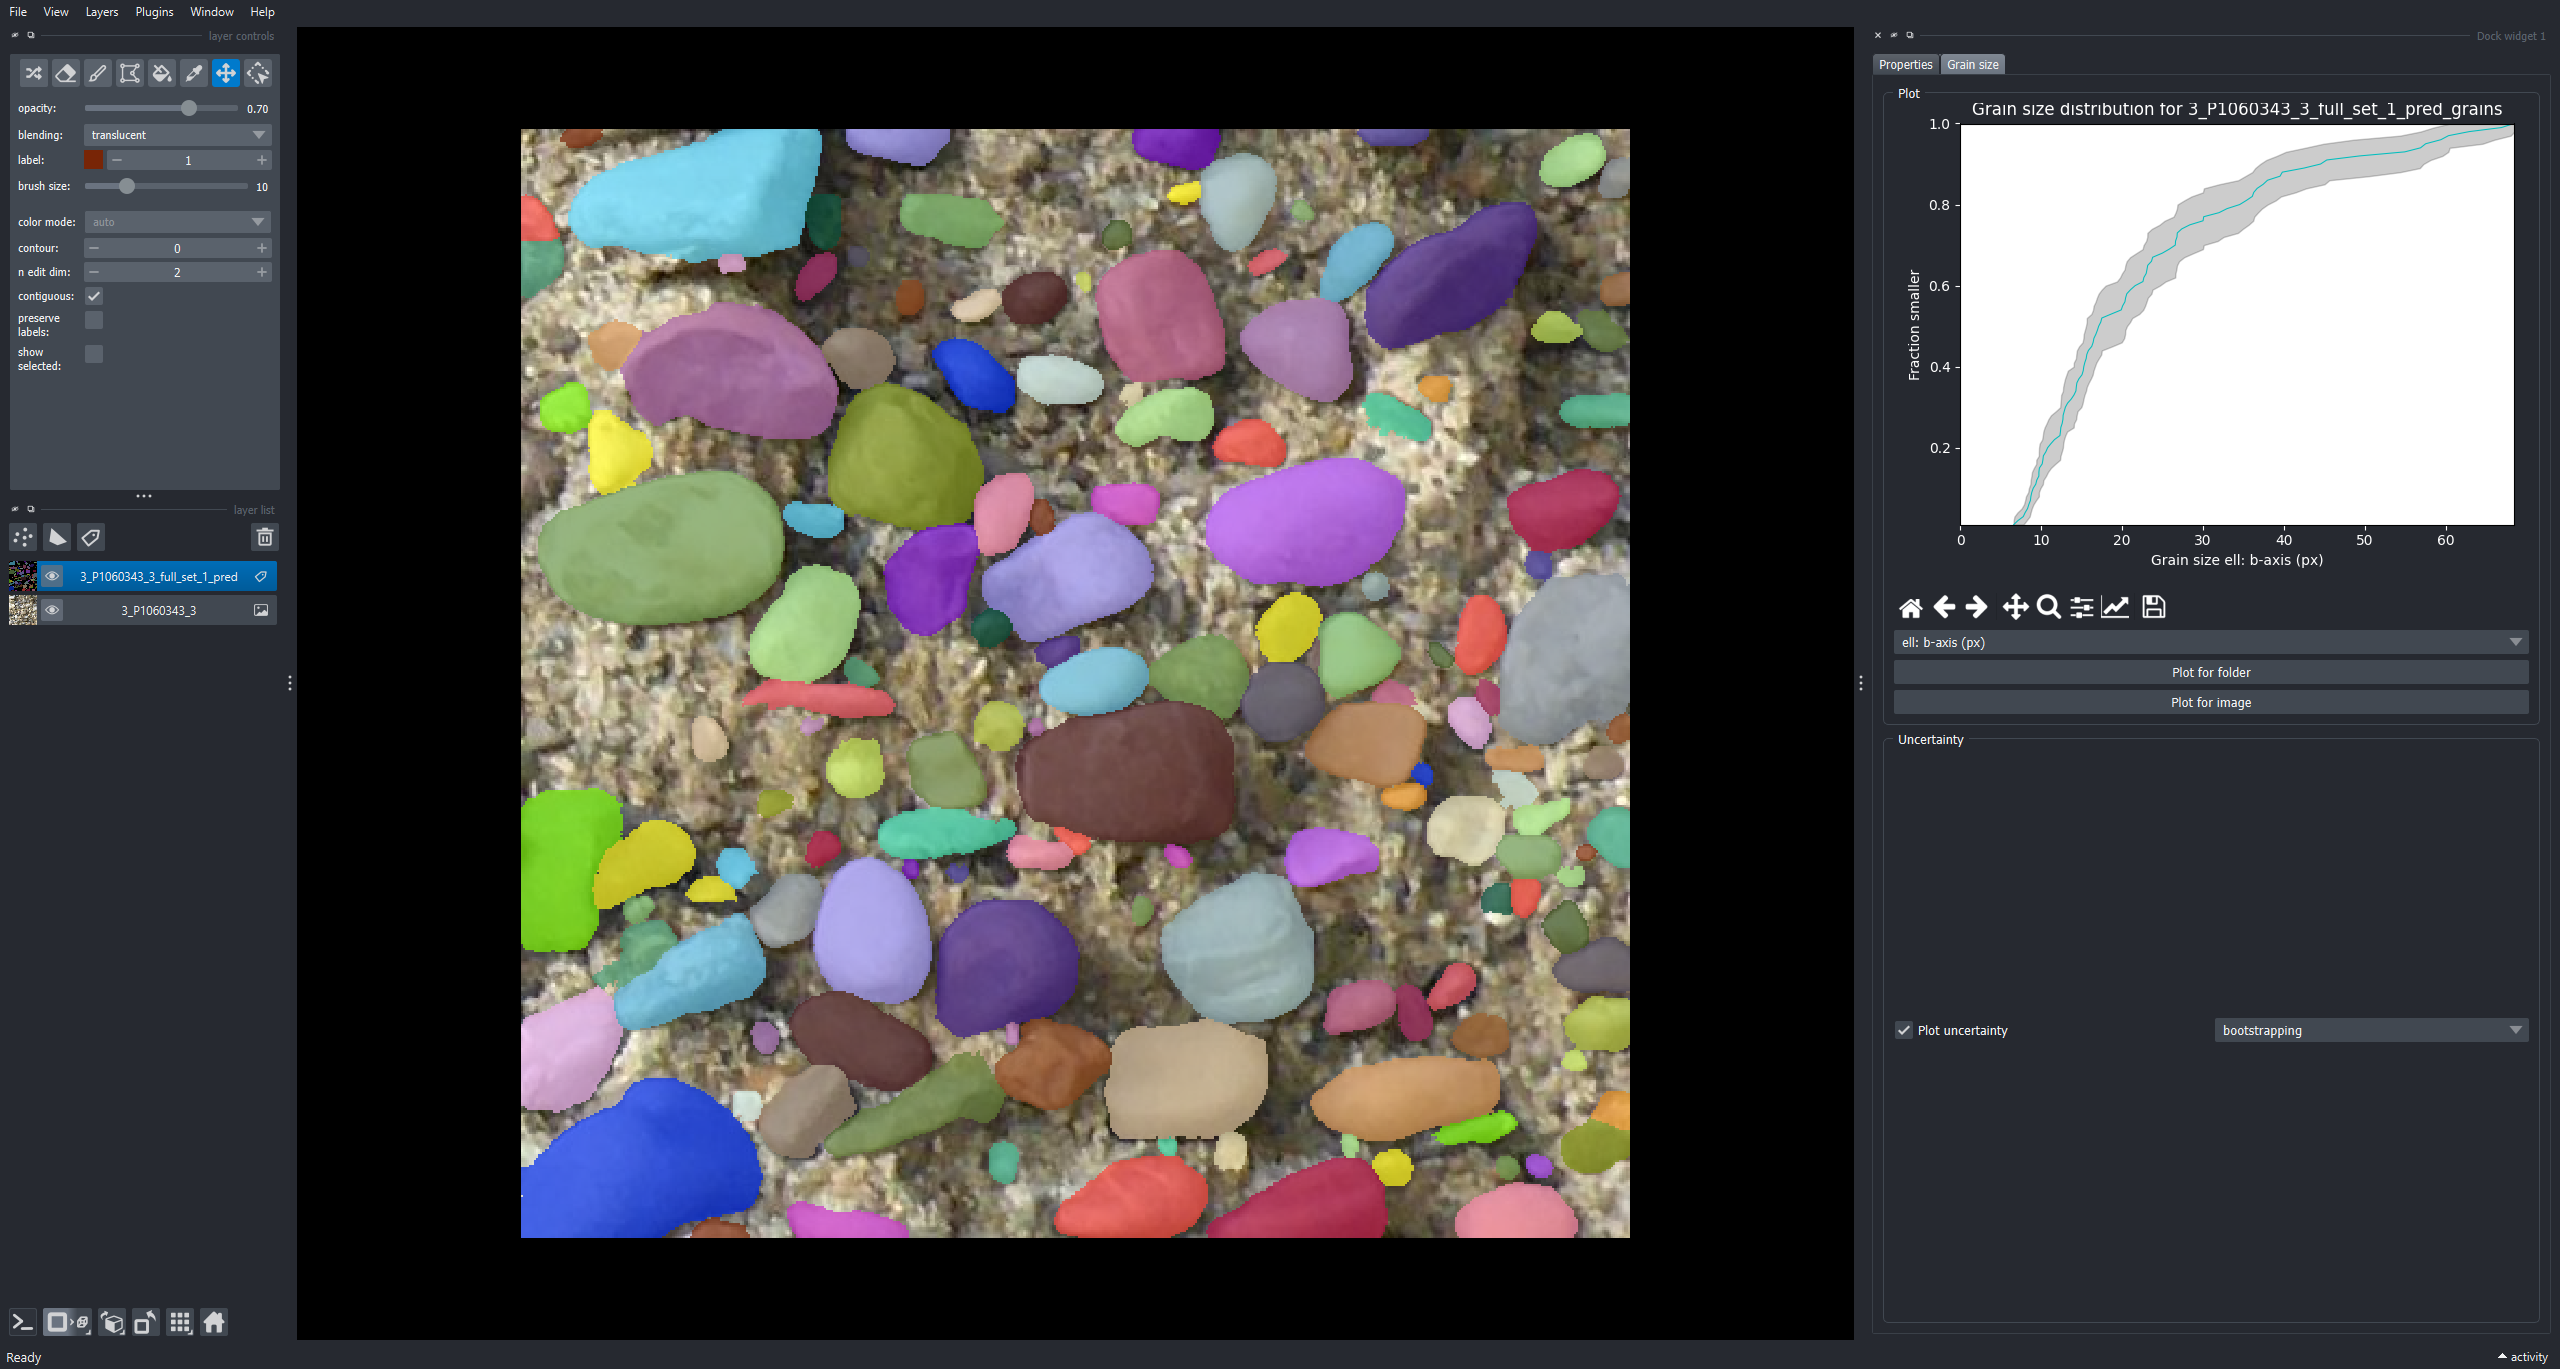

In [18]:
napari.utils.NotebookScreenshot(viewer)

---

In order to obtain the statistics for the entire folder, click on `Plot for folder`. A cumulative plot with the statistical data of every image from the image folder is displayed.

Again you can save the plot as image at the location of your choice by clicking on the `floppy disk` icon.

In [19]:
self._on_plot_gsd_dataset()

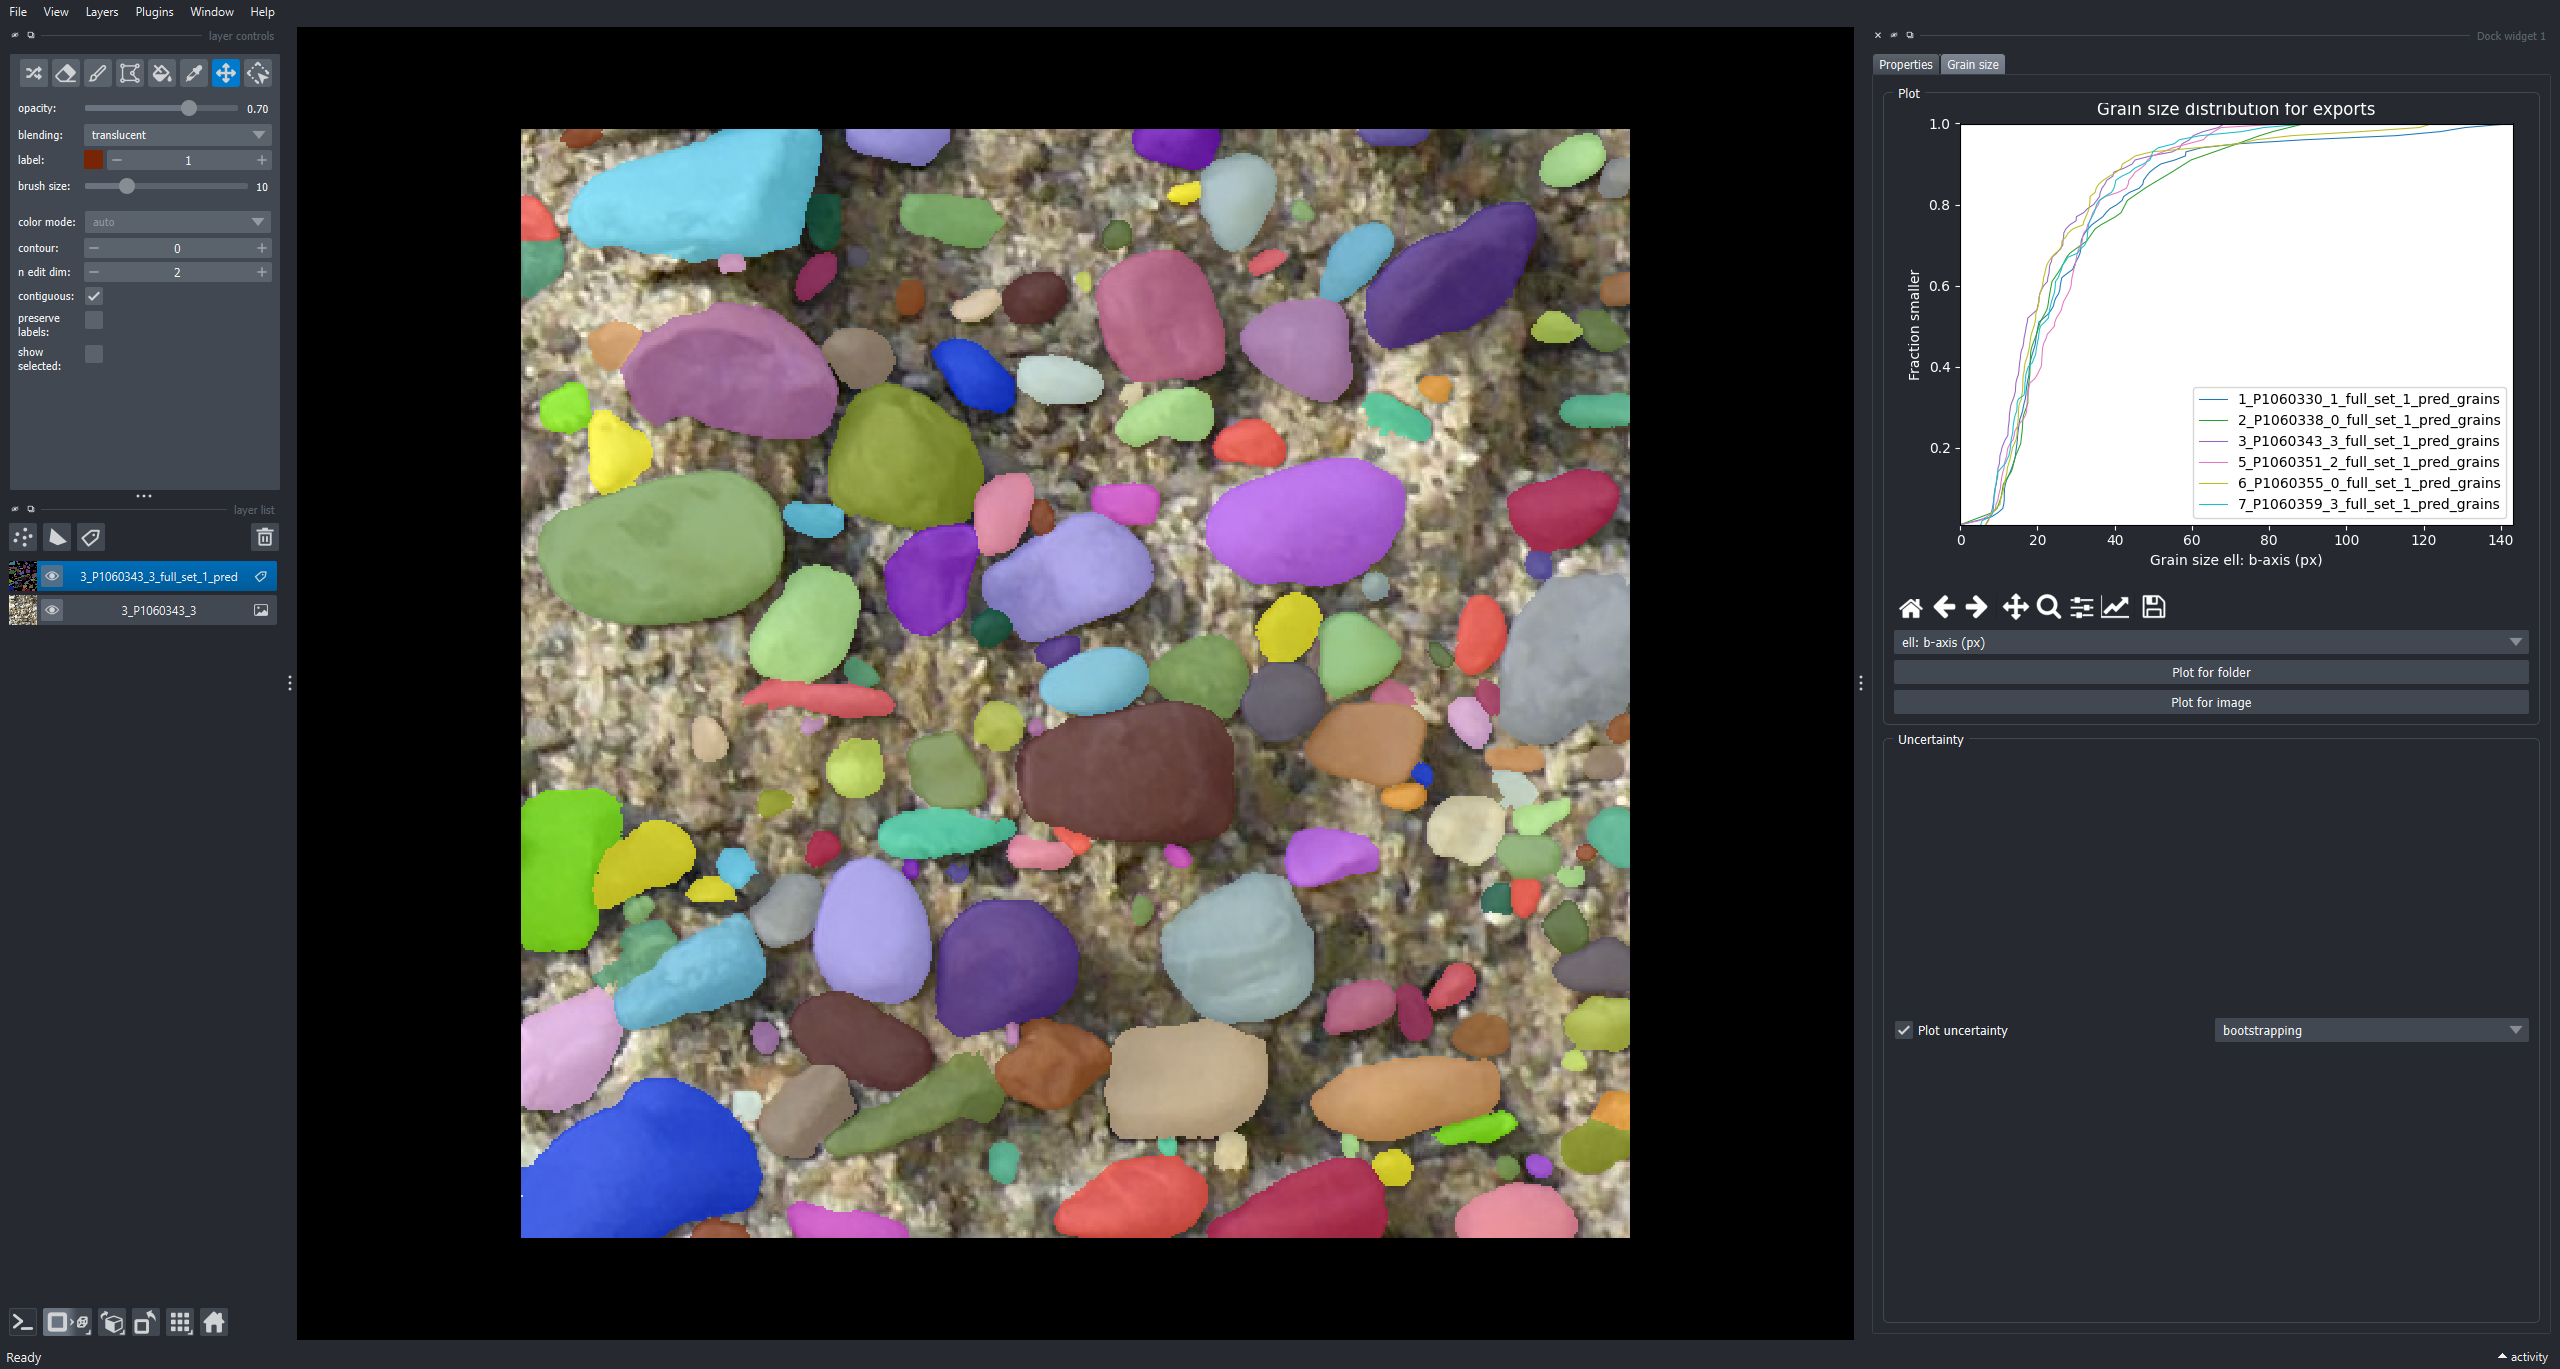

In [20]:
napari.utils.NotebookScreenshot(viewer)